### *Import packages

In [95]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm

sns.set_style("white")

pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",108)

# 1. Medical Appointments Dataset

In [2]:
med = pd.read_pickle("med.pkl")

In [3]:
med.head()

,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_Received,No_Show,Day_Of_Week,Waiting_Days
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,Jardim Da Penha,0,1,0,0,0,0,No,Friday,0
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,Jardim Da Penha,0,0,0,0,0,0,No,Friday,0
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,Mata Da Praia,0,0,0,0,0,0,No,Friday,0
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,Pontal De Camburi,0,0,0,0,0,0,No,Friday,0
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,Jardim Da Penha,0,1,1,0,0,0,No,Friday,0


In [4]:
med.Appointment_Day.unique().sort()

In [5]:
to_drop1 = med[med['Appointment_Day'] < '2016-05-01'].index
to_drop2 = med[med['Appointment_Day'] > '2016-05-30'].index
 
# Delete these row indexes from dataFrame
med.drop(to_drop1, inplace=True)
med.drop(to_drop2, inplace=True)

In [6]:
med['Day'] = med['Appointment_Day'].dt.day

In [7]:
med.Day.unique()

array([ 3, 10, 17, 24,  2, 30, 16,  4, 19, 12,  6, 20,  5, 13,  9, 25, 11,
       18, 14], dtype=int64)

In [8]:
med.shape

(76557, 17)

# 2. Weather Dataset

### 2.1 Create dataset
    based on: ...

In [9]:
weather_list = [['1', '24.8', '32', '20', '1013.6', '77', '0', '15.8', '7.4', '20.6', '37', '\xa0', '\xa0', 'o', '\xa0'],
['2', '25.2', '30', '21.5', '1012.5', '80', '0.25', '15.3', '9.1', '16.5', '-', '\xa0', '\xa0', '\xa0', '\xa0'],
['3', '24.9', '27.1', '23', '1012.7', '78', '0', '13.7', '9.8', '20.6', '-', '\xa0', '\xa0', '\xa0', '\xa0'],
['4', '25.2', '29', '22.7', '1012.8', '86', '0', '14.3', '8.3', '25.9', '-', '\xa0', '\xa0', '\xa0', '\xa0'],
['5', '25.9', '31', '22', '1013.5', '80', '0', '13.8', '11.7', '25.9', '-', '\xa0', '\xa0', '\xa0', '\xa0'],
['6', '26.8', '34', '24', '1011.7', '79', '0', '14.3', '14.6', '31.7', '-', '\xa0', '\xa0', '\xa0', '\xa0'],
['7', '24.7', '27', '23', '1011.8', '85', '0', '13', '14.6', '29.4', '-', '\xa0', '\xa0', '\xa0', '\xa0'],
['8', '23.4', '25.5', '22', '1016.5', '78', '0', '13.4', '17.6', '25.9', '-', '\xa0', '\xa0', '\xa0', '\xa0'],
['9', '20.6', '22', '19', '1019.4', '81', '5.08', '12.1', '15.4', '24.1', '-', 'o', '\xa0', '\xa0', '\xa0'],
['10', '21.4', '24', '19.8', '1020.3', '68', '0', '13.4', '9.6', '16.5', '-', '\xa0', '\xa0', '\xa0', '\xa0'],
['11', '21', '23.2', '20', '1019.7', '72', '0.25', '12.2', '15.7', '29.4', '-', 'o', '\xa0', '\xa0', '\xa0'],
['12', '19.9', '21', '18', '1023.7', '66', '0.51', '12.7', '12.6', '16.5', '-', 'o', '\xa0', '\xa0', '\xa0'],
['13', '20', '22.2', '18', '1026.6', '61', '0', '14.6', '21.5', '33.5', '-', '\xa0', '\xa0', '\xa0', '\xa0'],
['14', '21.1', '25.1', '17.7', '1027.7', '62', '0', '14.6', '18', '25.9', '-', '\xa0', '\xa0', '\xa0', '\xa0'],
['15', '19', '25', '13', '1026.1', '75', '0', '15.3', '9.6', '24.1', '-', '\xa0', '\xa0', '\xa0', '\xa0'],
['16', '19.6', '25', '15', '1024', '74', '0', '15.3', '9.8', '22.2', '-', '\xa0', '\xa0', '\xa0', '\xa0'],
['17', '20.4', '27', '14.8', '1021.9', '73', '0', '16.7', '9.1', '20.6', '-', '\xa0', '\xa0', '\xa0', '\xa0'],
['18', '20.6', '29', '13.5', '1020.4', '71', '0', '18.7', '8.3', '24.1', '-', '\xa0', '\xa0', '\xa0', '\xa0'],
['19', '20', '24.5', '15', '1022', '86', '0', '13.5', '8.7', '24.1', '-', '\xa0', '\xa0', '\xa0', '\xa0'],
['20', '21.7', '25', '18.7', '1021.3', '87', '0', '11.4', '8', '22.2', '-', '\xa0', '\xa0', '\xa0', '\xa0'],
['21', '21.8', '24', '19.7', '1022.9', '83', '6.1', '10.5', '14.3', '27.8', '-', 'o', '\xa0', '\xa0', '\xa0'],
['22', '20.4', '22', '19', '1023.6', '92', '16', '8', '11.7', '20.6', '33.5', 'o', '\xa0', '\xa0', '\xa0'],
['23', '21.9', '28', '17.7', '1020.5', '84', '8.89', '15', '6.1', '16.5', '-', '\xa0', '\xa0', '\xa0', '\xa0'],
['24', '22.1', '25', '19', '1021.9', '83', '0', '13.2', '15', '22.2', '-', '\xa0', '\xa0', '\xa0', '\xa0'],
['25', '21.1', '23.2', '19.7', '1025', '85', '0.51', '12.1', '14.1', '22.2', '-', 'o', '\xa0', '\xa0', '\xa0'],
['26', '19.9', '23', '15.8', '1026.2', '88', '6.1', '11.4', '8.7', '20.6', '-', 'o', '\xa0', '\xa0', '\xa0'],
['27', '19.8', '22', '18', '1026.3', '95', '5.08', '8.9', '8.1', '20.6', '-', 'o', '\xa0', '\xa0', '\xa0'],
['28', '21.8', '25', '19.5', '1025.8', '85', '8.89', '10.1', '8', '13', '-', 'o', '\xa0', '\xa0', '\xa0'],
['29', '20.4', '24.2', '17.5', '1024.6', '92', '0', '11.3', '5.2', '16.5', '-', 'o', '\xa0', '\xa0', '\xa0'],
['30', '22.4', '25.5', '20', '1023.9', '90', '2.29', '12.9', '7', '18.3', '-', '\xa0', '\xa0', '\xa0', '\xa0']]

weather = pd.DataFrame(columns=['Day', 'T', 'TM', 'Tm', 'SLP', 'H', 'PP', 'VV', 'V', 'VM', 'VG', 'RA', 'SN', 'TS', 'FG'], data=weather_list)

### 2.2 Analysis & cleaning

In [10]:
weather.head()

,Day,T,TM,Tm,SLP,H,PP,VV,V,VM,VG,RA,SN,TS,FG
0,1,24.8,32,20,1013.6,77,0,15.8,7.4,20.6,37,,,o,
1,2,25.2,30,21.5,1012.5,80,0.25,15.3,9.1,16.5,-,,,,
2,3,24.9,27.1,23,1012.7,78,0,13.7,9.8,20.6,-,,,,
3,4,25.2,29,22.7,1012.8,86,0,14.3,8.3,25.9,-,,,,
4,5,25.9,31,22,1013.5,80,0,13.8,11.7,25.9,-,,,,


column descriptions:<br>
<br>
Day - day date of Mai, 2016<br>
T - average temperature (ºC.)<br>
TM - maximum average temperature (ºC.)<br>
Tm - minimum average temperature (ºC.)<br>
SLP - atmospheric pressure at sea level<br>
H - average relative humidity<br>
PP - total rainfall and / or melted snow<br>
VV - average visibility (Km)<br>
V - average wind speed (Km/h)<br>
VM - maximum sustained wind speed (Km/h)<br>

In [11]:
weather.dtypes

Day    object
T      object
TM     object
Tm     object
SLP    object
H      object
PP     object
VV     object
V      object
VM     object
VG     object
RA     object
SN     object
TS     object
FG     object
dtype: object

In [12]:
weather.drop(['VG', 'RA', 'SN', 'TS', 'FG'], axis=1, inplace=True)

In [13]:
weather.isnull().sum(axis = 0)

Day    0
T      0
TM     0
Tm     0
SLP    0
H      0
PP     0
VV     0
V      0
VM     0
dtype: int64

In [14]:
weather[['T', 'TM', 'Tm', 'SLP', 'H', 'PP', 'VV', 'V', 'VM']] = weather[['T', 'TM', 'Tm', 'SLP', 'H', 'PP', 'VV', 'V', 'VM']].apply(pd.to_numeric)

In [40]:
weather[['Day']] = weather[['Day']].astype('int')

In [43]:
weather.dtypes

Day          int32
T          float64
TM         float64
Tm         float64
SLP        float64
H            int64
PP         float64
VV         float64
V          float64
VM         float64
col.Day      int32
dtype: object

### 2.3 Plotting

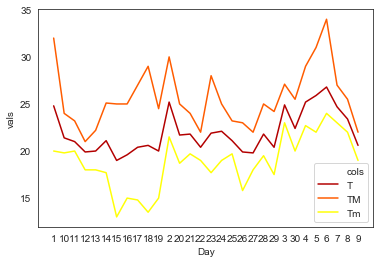

In [16]:
#sns.lineplot(x='Day', y=[['T','TM','Tm']], data=weather, palette="hot", linewidth=2.5);

temp = weather[['Day','T','TM','Tm']].melt('Day', var_name='cols',  value_name='vals')
temp_plot = sns.lineplot(x="Day", y="vals", hue='cols', data=temp, palette="hot")

In [17]:
weather.nlargest(5, ['T'])[['Day','T']]

,Day,T
5,6,26.8
4,5,25.9
1,2,25.2
3,4,25.2
2,3,24.9


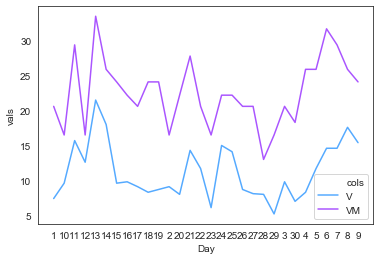

In [18]:
wind = weather[['Day','V','VM']].melt('Day', var_name='cols',  value_name='vals')
wind_speed_plot = sns.lineplot(x="Day", y="vals", hue='cols', data=wind, palette="cool")

In [19]:
weather.nlargest(5, ['V'])[['Day','V']]

,Day,V
12,13,21.5
13,14,18.0
7,8,17.6
10,11,15.7
8,9,15.4


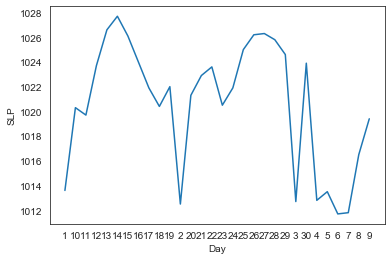

In [20]:
pressure_plot = sns.lineplot(x="Day", y="SLP", data=weather)

In [21]:
weather.nlargest(5, ['SLP'])[['Day','SLP']]

,Day,SLP
13,14,1027.7
12,13,1026.6
26,27,1026.3
25,26,1026.2
14,15,1026.1


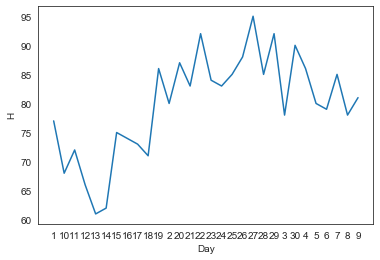

In [22]:
humidity_plot = sns.lineplot(x="Day", y="H", data=weather)

In [23]:
weather.nlargest(5, ['H'])[['Day','H']]

,Day,H
26,27,95
21,22,92
28,29,92
29,30,90
25,26,88


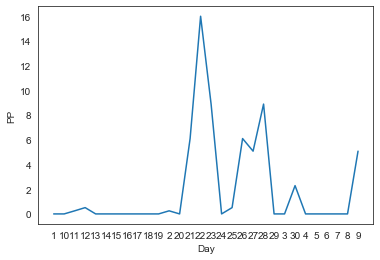

In [24]:
rain_snow_plot = sns.lineplot(x="Day", y="PP", data=weather)

In [25]:
weather.PP.value_counts()

0.00     18
8.89      2
6.10      2
0.51      2
5.08      2
0.25      2
2.29      1
16.00     1
Name: PP, dtype: int64

In [26]:
weather.nlargest(5, ['PP'])[['Day','PP']]

,Day,PP
21,22,16.00
22,23,8.89
27,28,8.89
20,21,6.10
25,26,6.10


In 12 out of 30 days, it was rainy/snowy. 

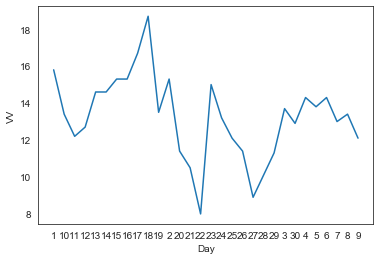

In [27]:
visibility_plot = sns.lineplot(x="Day", y="VV", data=weather)

In [28]:
# replace largest to find lowest 5 data points
weather.nlargest(30, ['VV'])[['Day','VV']]

,Day,VV
17,18,18.7
16,17,16.7
0,1,15.8
14,15,15.3
1,2,15.3
15,16,15.3
22,23,15.0
12,13,14.6
13,14,14.6
5,6,14.3


# 3. Merge

In [44]:
med_weather = pd.merge(med, weather, how='left', on='Day')

In [45]:
med_weather.drop(['Day'], axis=1, inplace=True)

In [46]:
med_weather.head()

,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_Received,No_Show,Day_Of_Week,Waiting_Days,T,TM,Tm,SLP,H,PP,VV,V,VM,col.Day
0,49839442791312,5530556,F,2016-03-31,2016-05-03,49,Maria Ortiz,0,0,0,0,0,1,Yes,Tuesday,33,24.9,27.1,23.0,1012.7,78,0.0,13.7,9.8,20.6,3
1,89577527157879,5549661,F,2016-04-06,2016-05-10,73,Maria Ortiz,0,0,0,0,0,1,No,Tuesday,34,21.4,24.0,19.8,1020.3,68,0.0,13.4,9.6,16.5,10
2,466144648716,5613929,F,2016-04-25,2016-05-17,51,Maria Ortiz,0,0,0,0,0,0,No,Tuesday,22,20.4,27.0,14.8,1021.9,73,0.0,16.7,9.1,20.6,17
3,86781189971276,5731976,F,2016-05-24,2016-05-24,20,Maria Ortiz,0,0,0,0,0,0,No,Tuesday,0,22.1,25.0,19.0,1021.9,83,0.0,13.2,15.0,22.2,24
4,22485762244839,5530614,F,2016-03-31,2016-05-03,24,Maria Ortiz,0,0,0,0,0,1,Yes,Tuesday,33,24.9,27.1,23.0,1012.7,78,0.0,13.7,9.8,20.6,3


In [47]:
med_weather.dtypes

Patient_ID                  int64
Appointment_ID              int64
Gender                     object
Scheduled_Day      datetime64[ns]
Appointment_Day    datetime64[ns]
Age                         int64
Neighbourhood              object
Scholarship                 int64
Hypertension                int64
Diabetes                    int64
Alcoholism                  int64
Handicap                    int64
SMS_Received                int64
No_Show                    object
Day_Of_Week                object
Waiting_Days                int64
T                         float64
TM                        float64
Tm                        float64
SLP                       float64
H                           int64
PP                        float64
VV                        float64
V                         float64
VM                        float64
col.Day                     int32
dtype: object

In [59]:
med_weather['Gender'] = (med_weather['Gender'] == 'F').astype(int) #keeping Female (F) in Gender as 1, else 0
med_weather['No_Show'] = (med_weather['No_Show'] == 'Yes').astype(int) #keeping Yes in No_Show as 1, else 0

In [60]:
# Create Age_floats to store age values as floats
Age_floats = med_weather[['Age']].values.astype(float)

# Create min & max processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
Age_scaled = min_max_scaler.fit_transform(Age_floats)

KeyError: "None of [Index(['Age'], dtype='object')] are in the [columns]"

In [61]:
med_weather['Age_Normalized'] = Age_scaled

In [62]:
med_weather.drop(['Age'], axis=1, inplace=True)

KeyError: "['Age'] not found in axis"

In [63]:
Waiting_days_floats = med_weather[['Waiting_Days']].values.astype(float)

# Create min & max processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
Waiting_days_scaled = min_max_scaler.fit_transform(Waiting_days_floats)

KeyError: "None of [Index(['Waiting_Days'], dtype='object')] are in the [columns]"

In [64]:
med_weather['Waiting_Days_Normalized'] = Waiting_days_floats

In [65]:
med_weather.drop(['Waiting_Days'], axis=1, inplace=True)

KeyError: "['Waiting_Days'] not found in axis"

In [66]:
med_weather.drop(['col.Day'], axis=1, inplace=True)

KeyError: "['col.Day'] not found in axis"

In [67]:
med_weather.head()

,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_Received,No_Show,Day_Of_Week,T,TM,Tm,SLP,H,PP,VV,V,VM,Age_Normalized,Waiting_Days_Normalized
0,49839442791312,5530556,1,2016-03-31,2016-05-03,Maria Ortiz,0,0,0,0,0,1,1,Tuesday,24.9,27.1,23.0,1012.7,78,0.0,13.7,9.8,20.6,0.426087,33.0
1,89577527157879,5549661,1,2016-04-06,2016-05-10,Maria Ortiz,0,0,0,0,0,1,0,Tuesday,21.4,24.0,19.8,1020.3,68,0.0,13.4,9.6,16.5,0.634783,34.0
2,466144648716,5613929,1,2016-04-25,2016-05-17,Maria Ortiz,0,0,0,0,0,0,0,Tuesday,20.4,27.0,14.8,1021.9,73,0.0,16.7,9.1,20.6,0.443478,22.0
3,86781189971276,5731976,1,2016-05-24,2016-05-24,Maria Ortiz,0,0,0,0,0,0,0,Tuesday,22.1,25.0,19.0,1021.9,83,0.0,13.2,15.0,22.2,0.173913,0.0
4,22485762244839,5530614,1,2016-03-31,2016-05-03,Maria Ortiz,0,0,0,0,0,1,1,Tuesday,24.9,27.1,23.0,1012.7,78,0.0,13.7,9.8,20.6,0.208696,33.0


In [68]:
med_weather_ml = pd.get_dummies(med_weather,  columns=["Neighbourhood", "Handicap", "SMS_Received", "Day_Of_Week"], drop_first=True)
med_weather_ml.head()

,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Scholarship,Hypertension,Diabetes,Alcoholism,No_Show,T,TM,Tm,SLP,H,PP,VV,V,VM,Age_Normalized,Waiting_Days_Normalized,Neighbourhood_Andorinhas,Neighbourhood_Antônio Honório,Neighbourhood_Ariovaldo Favalessa,Neighbourhood_Barro Vermelho,Neighbourhood_Bela Vista,Neighbourhood_Bento Ferreira,Neighbourhood_Boa Vista,Neighbourhood_Bonfim,Neighbourhood_Caratoíra,Neighbourhood_Centro,Neighbourhood_Comdusa,Neighbourhood_Conquista,Neighbourhood_Consolação,Neighbourhood_Cruzamento,Neighbourhood_Da Penha,Neighbourhood_De Lourdes,Neighbourhood_Do Cabral,Neighbourhood_Do Moscoso,Neighbourhood_Do Quadro,Neighbourhood_Enseada Do Suá,Neighbourhood_Estrelinha,Neighbourhood_Fonte Grande,Neighbourhood_Forte São João,Neighbourhood_Fradinhos,Neighbourhood_Goiabeiras,Neighbourhood_Grande Vitória,Neighbourhood_Gurigica,Neighbourhood_Horto,Neighbourhood_Ilha Das Caieiras,...,Neighbourhood_Jesus De Nazareth,Neighbourhood_Joana D´Arc,Neighbourhood_Jucutuquara,Neighbourhood_Maria Ortiz,Neighbourhood_Maruípe,Neighbourhood_Mata Da Praia,Neighbourhood_Monte Belo,Neighbourhood_Morada De Camburi,Neighbourhood_Mário Cypreste,Neighbourhood_Nazareth,Neighbourhood_Nova Palestina,Neighbourhood_Parque Industrial,Neighbourhood_Parque Moscoso,Neighbourhood_Piedade,Neighbourhood_Pontal De Camburi,Neighbourhood_Praia Do Canto,Neighbourhood_Praia Do Suá,Neighbourhood_Redenção,Neighbourhood_República,Neighbourhood_Resistência,Neighbourhood_Romão,Neighbourhood_Santa Cecília,Neighbourhood_Santa Clara,Neighbourhood_Santa Helena,Neighbourhood_Santa Luíza,Neighbourhood_Santa Lúcia,Neighbourhood_Santa Martha,Neighbourhood_Santa Tereza,Neighbourhood_Santo André,Neighbourhood_Santo Antônio,Neighbourhood_Santos Dumont,Neighbourhood_Santos Reis,Neighbourhood_Segurança Do Lar,Neighbourhood_Solon Borges,Neighbourhood_São Benedito,Neighbourhood_São Cristóvão,Neighbourhood_São José,Neighbourhood_São Pedro,Neighbourhood_Tabuazeiro,Neighbourhood_Universitário,Neighbourhood_Vila Rubim,Handicap_1,Handicap_2,Handicap_3,SMS_Received_1,Day_Of_Week_Monday,Day_Of_Week_Saturday,Day_Of_Week_Thursday,Day_Of_Week_Tuesday,Day_Of_Week_Wednesday
0,49839442791312,5530556,1,2016-03-31,2016-05-03,0,0,0,0,1,24.9,27.1,23.0,1012.7,78,0.0,13.7,9.8,20.6,0.426087,33.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,89577527157879,5549661,1,2016-04-06,2016-05-10,0,0,0,0,0,21.4,24.0,19.8,1020.3,68,0.0,13.4,9.6,16.5,0.634783,34.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,466144648716,5613929,1,2016-04-25,2016-05-17,0,0,0,0,0,20.4,27.0,14.8,1021.9,73,0.0,16.7,9.1,20.6,0.443478,22.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,86781189971276,5731976,1,2016-05-24,2016-05-24,0,0,0,0,0,22.1,25.0,19.0,1021.9,83,0.0,13.2,15.0,22.2,0.173913,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,22485762244839,5530614,1,2016-03-31,2016-05-03,0,0,0,0,1,24.9,27.1,23.0,1012.7,78,0.0,13.7,9.8,20.6,0.208696,33.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [77]:
med_weather_ml.corr().abs()

,Patient_ID,Appointment_ID,Gender,Scholarship,Hypertension,Diabetes,Alcoholism,No_Show,T,TM,Tm,SLP,H,PP,VV,V,VM,Age_Normalized,Waiting_Days_Normalized,Neighbourhood_Andorinhas,Neighbourhood_Antônio Honório,Neighbourhood_Ariovaldo Favalessa,Neighbourhood_Barro Vermelho,Neighbourhood_Bela Vista,Neighbourhood_Bento Ferreira,Neighbourhood_Boa Vista,Neighbourhood_Bonfim,Neighbourhood_Caratoíra,Neighbourhood_Centro,Neighbourhood_Comdusa,Neighbourhood_Conquista,Neighbourhood_Consolação,Neighbourhood_Cruzamento,Neighbourhood_Da Penha,Neighbourhood_De Lourdes,Neighbourhood_Do Cabral,Neighbourhood_Do Moscoso,Neighbourhood_Do Quadro,Neighbourhood_Enseada Do Suá,Neighbourhood_Estrelinha,Neighbourhood_Fonte Grande,Neighbourhood_Forte São João,Neighbourhood_Fradinhos,Neighbourhood_Goiabeiras,Neighbourhood_Grande Vitória,Neighbourhood_Gurigica,Neighbourhood_Horto,Neighbourhood_Ilha Das Caieiras,Neighbourhood_Ilha De Santa Maria,Neighbourhood_Ilha Do Boi,...,Neighbourhood_Jesus De Nazareth,Neighbourhood_Joana D´Arc,Neighbourhood_Jucutuquara,Neighbourhood_Maria Ortiz,Neighbourhood_Maruípe,Neighbourhood_Mata Da Praia,Neighbourhood_Monte Belo,Neighbourhood_Morada De Camburi,Neighbourhood_Mário Cypreste,Neighbourhood_Nazareth,Neighbourhood_Nova Palestina,Neighbourhood_Parque Industrial,Neighbourhood_Parque Moscoso,Neighbourhood_Piedade,Neighbourhood_Pontal De Camburi,Neighbourhood_Praia Do Canto,Neighbourhood_Praia Do Suá,Neighbourhood_Redenção,Neighbourhood_República,Neighbourhood_Resistência,Neighbourhood_Romão,Neighbourhood_Santa Cecília,Neighbourhood_Santa Clara,Neighbourhood_Santa Helena,Neighbourhood_Santa Luíza,Neighbourhood_Santa Lúcia,Neighbourhood_Santa Martha,Neighbourhood_Santa Tereza,Neighbourhood_Santo André,Neighbourhood_Santo Antônio,Neighbourhood_Santos Dumont,Neighbourhood_Santos Reis,Neighbourhood_Segurança Do Lar,Neighbourhood_Solon Borges,Neighbourhood_São Benedito,Neighbourhood_São Cristóvão,Neighbourhood_São José,Neighbourhood_São Pedro,Neighbourhood_Tabuazeiro,Neighbourhood_Universitário,Neighbourhood_Vila Rubim,Handicap_1,Handicap_2,Handicap_3,SMS_Received_1,Day_Of_Week_Monday,Day_Of_Week_Saturday,Day_Of_Week_Thursday,Day_Of_Week_Tuesday,Day_Of_Week_Wednesday
Patient_ID,1.000000,0.002908,0.007837,0.003025,0.003002,0.001657,0.011705,0.002077,0.005822,0.002508,0.005776,0.006082,0.001598,0.000194,0.001427,0.000702,0.000735,0.003194,0.000334,0.004477,0.000872,0.002346,0.001324,0.005887,0.003738,0.005925,0.004987,0.000869,0.003277,0.002514,0.007105,0.008574,0.001552,0.011925,0.003551,0.005471,0.000978,0.005638,0.006723,0.004488,0.005053,0.010007,0.009963,0.004420,0.009907,0.005885,0.003874,0.003343,0.011560,0.014494,...,0.004247,0.008436,0.016524,0.000323,0.004660,0.003107,0.009029,0.002278,0.001437,0.007222,0.005497,0.001962,0.002383,0.005266,0.001388,6.613273e-03,0.000993,0.022934,0.002487,0.009709,0.014339,0.000616,0.010075,0.001468,0.002369,0.002730,0.010932,0.006039,0.010337,0.004155,0.009883,0.014120,0.007578,0.007892,0.007477,0.000164,0.001974,0.007400,0.007060,0.000594,0.007306,0.008834,0.004191,0.002994,0.010470,0.002090,0.005926,0.004387,0.002082,0.003207
Appointment_ID,0.002908,1.000000,0.025792,0.025023,0.014033,0.029587,0.036339,0.176244,0.263992,0.182548,0.249517,0.348849,0.097790,0.011906,0.044025,0.027344,0.052250,0.028809,0.873985,0.020181,0.006386,0.007217,0.011949,0.033012,0.000237,0.012330,0.024205,0.012374,0.012140,0.017719,0.017332,0.018725,0.011378,0.025928,0.006101,0.001210,0.005297,0.008539,0.004690,0.022950,0.038350,0.030073,0.009052,0.013744,0.029356,0.028509,0.004502,0.030058,0.023869,0.009575,...,0.021641,0.018320,0.022978,0.045045,0.045203,0.008176,0.027006,0.007477,0.021671,0.009241,0.039074,0.000433,0.004257,0.003971,0.002900,1.367469e-02,0.013919,0.020746,0.019219,0.023429,0.016103,0.041195,0.017300,0.008076,0.004895,0.008037,0.020626,0.009111,0.027720,0.034012,0.017848,0.018388,0.010745,0.015160,0.024118,0.006111,0.028577,0.038356,0.024361,0.005024,0.009087,0.019037,0.000710,0.001670,0.334557,

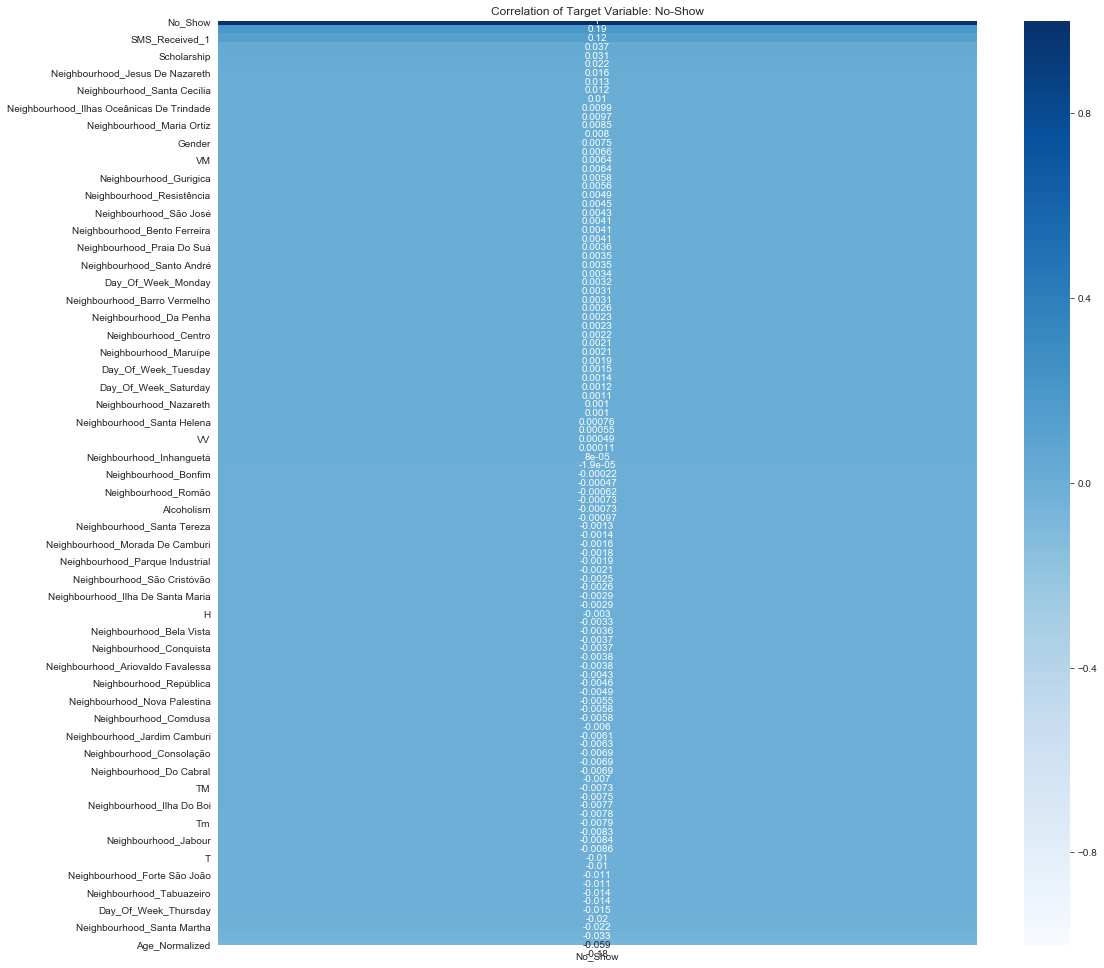

In [76]:
plt.figure(figsize=(17,17))
ax = sns.heatmap(med_weather_ml.corr()[['No_Show']].sort_values(by=['No_Show'],ascending=False),
            vmin=-1,
            vmax=1,
            cmap='Blues',
            annot=True);

bottom, top = ax.get_ylim()
#ax.set_ylim(bottom + 0.5, top + 0.5)
ax.set(title="Correlation of Target Variable: No-Show");

In [78]:
med_weather_ml1 = med_weather_ml.copy()

In [81]:
med_weather_ml1 = med_weather_ml1.drop(columns='No_Show')

KeyError: "['No_Show'] not found in axis"

In [83]:
corr = med_weather_ml1.corrwith(med_weather_ml['No_Show'])

In [92]:
correlation = corr.sort_values(ascending=False).to_frame()

In [96]:
correlation

,0
Waiting_Days_Normalized,0.194811
SMS_Received_1,0.118150
Neighbourhood_Itararé,0.036940
Scholarship,0.030992
Neighbourhood_Santos Dumont,0.022123
Neighbourhood_Jesus De Nazareth,0.015572
Neighbourhood_Caratoíra,0.013184
Neighbourhood_Santa Cecília,0.011700
Neighbourhood_Ilha Do Príncipe,0.010236
Neighbourhood_Ilhas Oceânicas De Trindade,0.009931


In [98]:
y = med_weather_ml[['No_Show']]#target / response as dependent variable

X = med_weather_ml.drop(['Patient_ID',
                 'Appointment_ID',
                 'Scheduled_Day', 
                 'Appointment_Day',
                 'No_Show'], axis=1) #predictors as independent variables

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=666)

In [100]:
rf_model = RandomForestClassifier(random_state=666, n_estimators=100)

rf_model.fit(X_train, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=666,
                       verbose=0, warm_start=False)

In [102]:
print("Model Feature Importances:\n")

for name, importance in zip(X.columns, np.sort(rf_model.feature_importances_)[::-1]):
    print(name,": {:.2f}".format(importance))

Model Feature Importances:

Gender : 0.28
Scholarship : 0.24
Hypertension : 0.04
Diabetes : 0.02
Alcoholism : 0.01
T : 0.01
TM : 0.01
Tm : 0.01
SLP : 0.01
H : 0.01
PP : 0.01
VV : 0.01
V : 0.01
VM : 0.01
Age_Normalized : 0.01
Waiting_Days_Normalized : 0.01
Neighbourhood_Andorinhas : 0.01
Neighbourhood_Antônio Honório : 0.01
Neighbourhood_Ariovaldo Favalessa : 0.01
Neighbourhood_Barro Vermelho : 0.01
Neighbourhood_Bela Vista : 0.01
Neighbourhood_Bento Ferreira : 0.01
Neighbourhood_Boa Vista : 0.01
Neighbourhood_Bonfim : 0.01
Neighbourhood_Caratoíra : 0.01
Neighbourhood_Centro : 0.01
Neighbourhood_Comdusa : 0.01
Neighbourhood_Conquista : 0.01
Neighbourhood_Consolação : 0.01
Neighbourhood_Cruzamento : 0.01
Neighbourhood_Da Penha : 0.01
Neighbourhood_De Lourdes : 0.01
Neighbourhood_Do Cabral : 0.01
Neighbourhood_Do Moscoso : 0.01
Neighbourhood_Do Quadro : 0.01
Neighbourhood_Enseada Do Suá : 0.01
Neighbourhood_Estrelinha : 0.01
Neighbourhood_Fonte Grande : 0.01
Neighbourhood_Forte São João :

In [101]:
rf_model.score(X_test, y_test)

0.7830459770114943

In [103]:
nb_model =  MultinomialNB().fit(X_train, y_train.values.ravel())

In [104]:
nb_model.score(X_test, y_test)

0.712251828631139

In [ ]:
svm_model = svm.SVC(gamma='auto').fit(X_train, y_train.values.ravel())

In [ ]:
svm_model.score(X_test, y_test)